In [1]:
from nearline_helpers import *

Welcome to JupyROOT 6.26/10


In [5]:
data = [
    [247,	10.04],
    [329,	12.12],
    [375,	14.1],
    [391,	14.95],
    [401,	15.56],
    [127,	7.12],
    [289,	10.76],
    [329,	12.04],
    [375,	14.07],
    [390,	14.95],
    [401,	15.58],
    [128,	7.13],
    [290,	10.78],
    [330,	12.07],
    [376,	14.06],
    [391,	14.95],
    [401,	15.55],
]
data.sort()

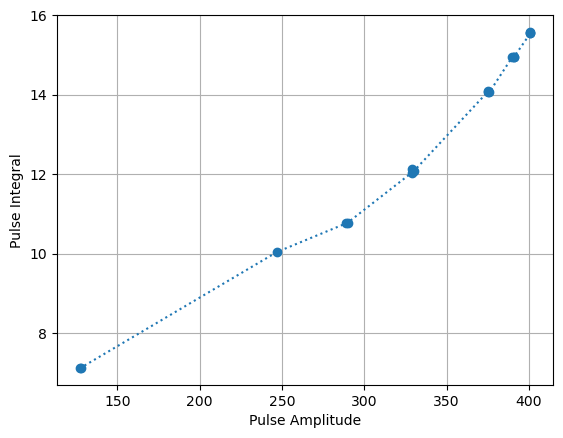

In [9]:
amplitudes, integrals = zip(*data)
plt.plot(amplitudes,integrals,"o:")
plt.xlabel("Pulse Amplitude")
plt.ylabel("Pulse Integral")
plt.grid()
plt.show()

---

In [55]:
import pandas
df = pandas.read_csv("~/Desktop/hv_fw_sweep.csv")
df.head()

,HV,FW,Area,Peak-to-Peak,Xdivs (mV),Ydivs (ns)
0,800,1,3.07,38.0,100,20
1,800,2,4.70,149.9,100,20
2,800,3,5.44,186.8,100,20
3,800,4,6.52,224.0,100,20
4,800,5,7.02,241.4,100,20


In [56]:
fw_settings = { # based on aarons elog... not sure if that's correct
    6:1.00,   # 
    1:0.14,    # ND 0.5 X ND 0.3 (Hybrid)
    2:0.28,    # ND 0.6
    3:0.45,    # ND 0.4
    4:0.65,    # ND 0.2
    5:0.82,    # ND 0.1
}
# df['attenuation_factor'] = df['FW'].apply(lambda x: fw_settings[x])
# df['Area_corr'] = df['Area'] / np.sqrt(df['attenuation_factor'])
# df.head()

In [57]:
df['ratio'] = df['Peak-to-Peak'] / df['Area']
df.sort_values(by=['HV', 'Area'], inplace=True)
df.head()

,HV,FW,Area,Peak-to-Peak,Xdivs (mV),Ydivs (ns),ratio
6,800,1,3.05,39.14,100,20,12.832787
0,800,1,3.07,38.00,100,20,12.377850
1,800,2,4.70,149.90,100,20,31.893617
7,800,2,4.77,153.70,100,20,32.222222
2,800,3,5.44,186.80,100,20,34.338235


(800, 100, 20)
(900, 100, 20)
(1000, 100, 20)
(1100, 100, 20)
(1100, 200, 20)
(1200, 100, 20)
(1300, 100, 20)
(1300, 200, 20)
(1400, 200, 20)


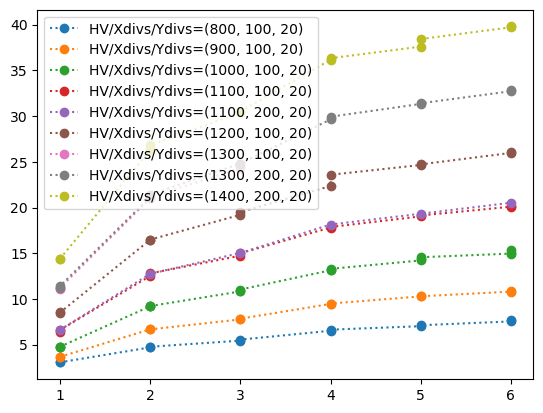

In [58]:
for i, dfi in df.groupby(by=['HV', 'Xdivs (mV)', 'Ydivs (ns)']):
    plt.plot(dfi['FW'], dfi['Area'], 'o:', label=f'HV/Xdivs/Ydivs={i}')
    print(i)
plt.legend()
plt.show()

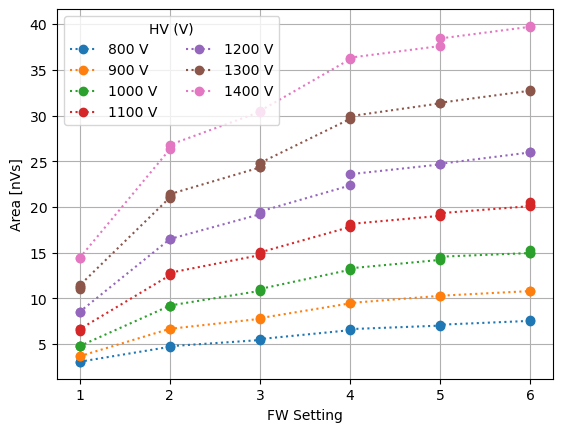

In [59]:
for i, dfi in df.groupby(by='HV'):
    plt.plot(dfi['FW'], dfi['Area'], 'o:', label=f'{i} V')
    plt.xlabel("FW Setting")
    plt.ylabel("Area [nVs]")
    # print(i)
plt.legend(title='HV (V)',ncol=2)
plt.grid()
plt.show()

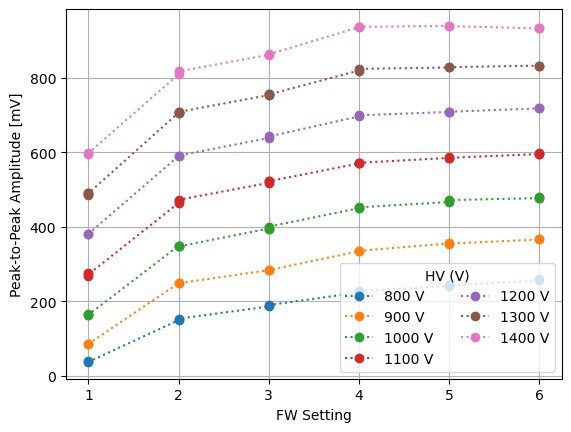

In [60]:
for i, dfi in df.groupby(by='HV'):
    plt.plot(dfi['FW'], dfi['Peak-to-Peak'], 'o:', label=f'{i} V')
    plt.xlabel("FW Setting")
    plt.ylabel("Peak-to-Peak Amplitude [mV]")
    # print(i)
plt.legend(title='HV (V)',ncol=2)
plt.grid()
plt.show()

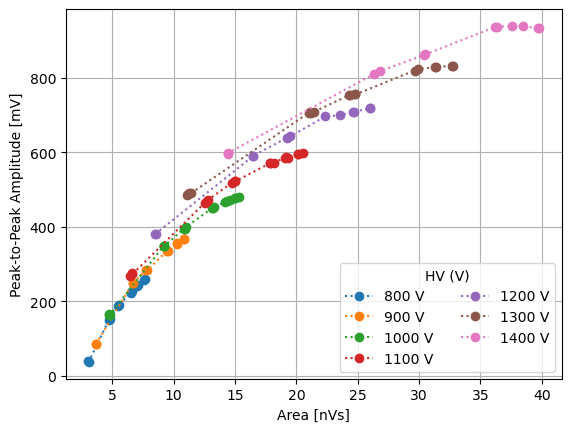

In [61]:
for i, dfi in df.groupby(by='HV'):
    plt.plot(dfi['Area'], dfi['Peak-to-Peak'], 'o:', label=f'{i} V')
    plt.xlabel("Area [nVs]")
    plt.ylabel("Peak-to-Peak Amplitude [mV]")
    # print(i)
plt.legend(title='HV (V)',ncol=2)
plt.grid()
plt.show()

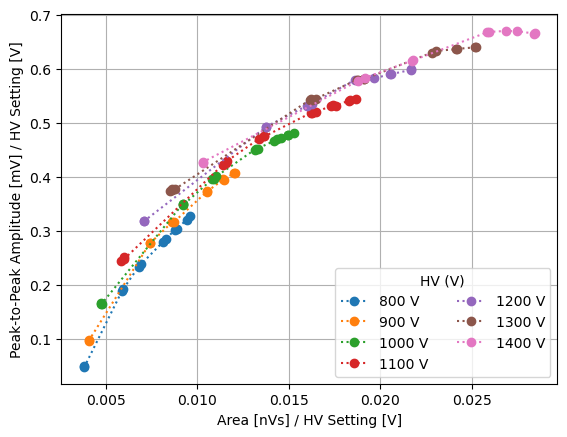

In [62]:
for i, dfi in df.groupby(by='HV'):
    scale_factor = np.power(dfi['HV'],1)
    plt.plot(dfi['Area']/scale_factor, dfi['Peak-to-Peak']/scale_factor, 'o:', label=f'{i} V')
    plt.xlabel("Area [nVs] / HV Setting [V]")
    plt.ylabel("Peak-to-Peak Amplitude [mV] / HV Setting [V]")
    # print(i)
plt.legend(title='HV (V)',ncol=2)
plt.grid()
plt.show()

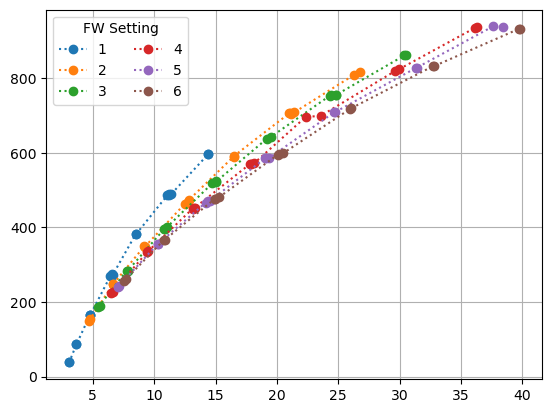

In [63]:
for i, dfi in df.groupby(by='FW'):
    plt.plot(dfi['Area'], dfi['Peak-to-Peak'], 'o:', label=f'{i}')
    # print(i)
plt.legend(title='FW Setting',ncol=2)
plt.grid()
plt.show()

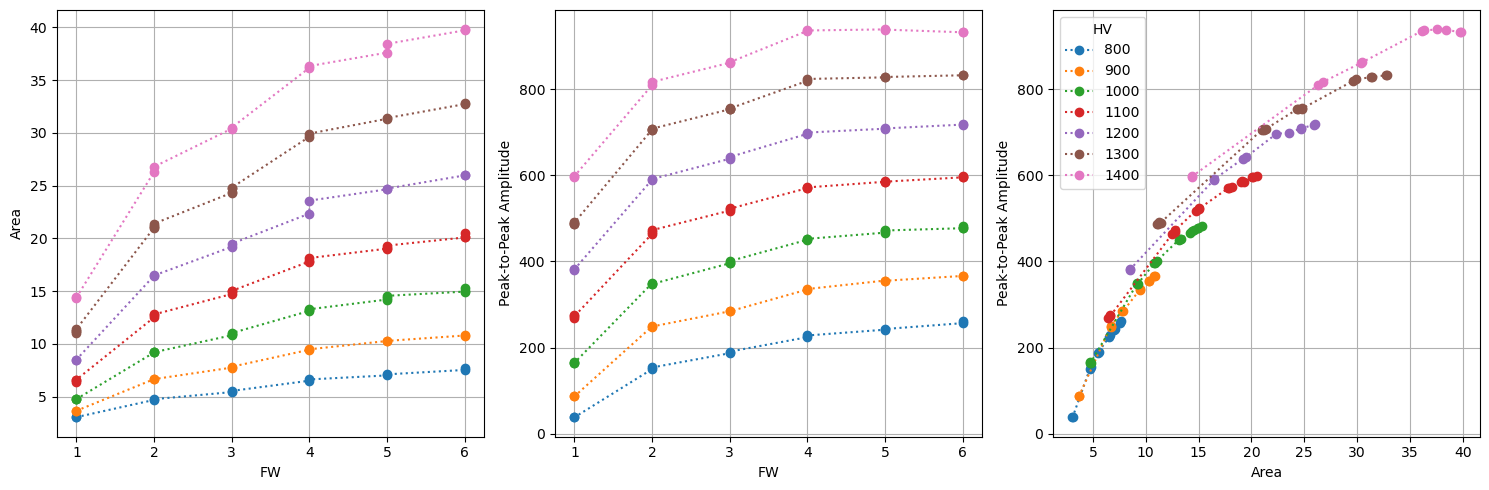

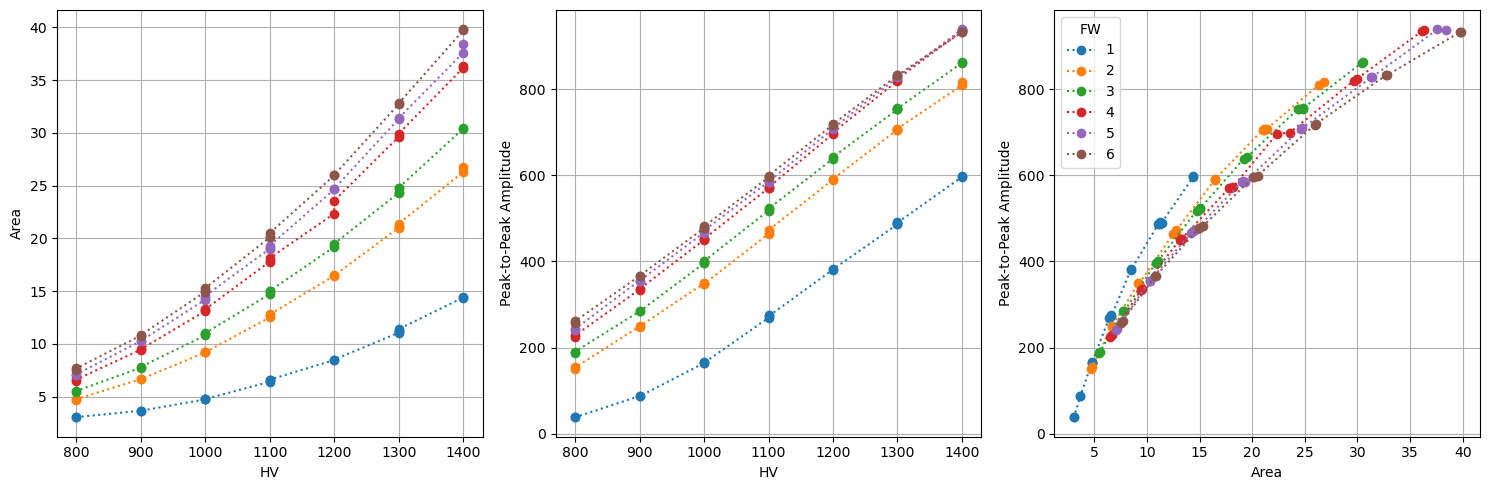

In [64]:
split_var = 'HV'
xs = 'FW'

for split_var, xs in ([['HV', 'FW'],['FW','HV']]):

    fig,ax = plt.subplots(1,3,figsize=(15,5))
    for i, dfi in df.groupby(by=split_var):
        ax[0].plot(dfi[xs], dfi['Area'], 'o:', label=f'{i}')
        ax[0].set_ylabel('Area')
        ax[1].plot(dfi[xs], dfi['Peak-to-Peak'], 'o:', label=f'{i}')
        ax[1].set_ylabel('Peak-to-Peak Amplitude')
        ax[2].plot(dfi['Area'], dfi['Peak-to-Peak'], 'o:', label=f'{i}')
        ax[2].set_xlabel('Area')
        ax[2].set_ylabel('Peak-to-Peak Amplitude')

    ax[2].legend(title=split_var)
    for i,axi in enumerate(ax):
        axi.grid()
        if( i < 2):
            axi.set_xlabel(xs)
    plt.tight_layout()
    plt.show()


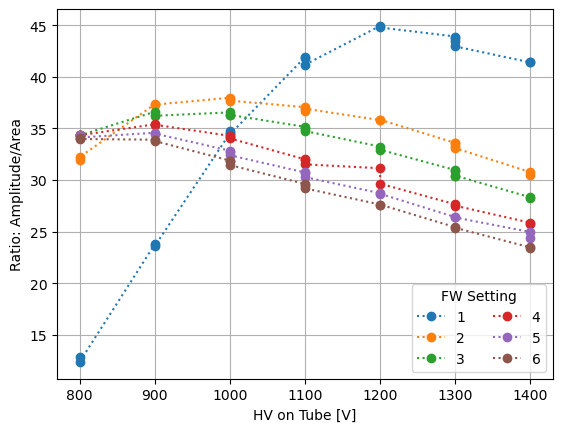

In [66]:
for i, dfi in df.groupby(by='FW'):
    plt.plot(dfi['HV'], dfi['ratio'], 'o:', label=f'{i}')
    # print(i)
plt.legend(title='FW Setting',ncol=2)
plt.ylabel("Ratio: Amplitude/Area")
plt.xlabel("HV on Tube [V]")
plt.grid()
plt.show()

---

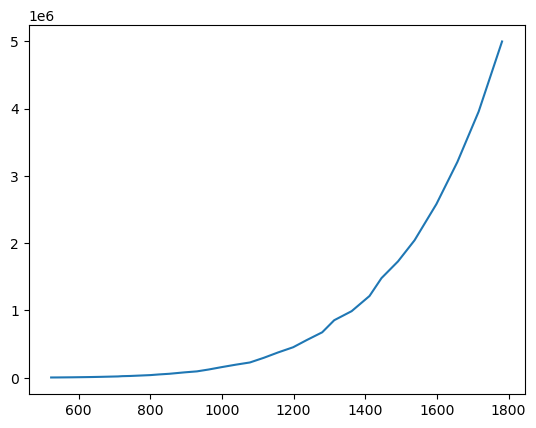

In [67]:
hamamatsu_gain_data = [
    [523.5559675493824, 3257.088269951857],
    [541.7031856679239, 3783.984001148652],
    [561.3986042627109, 4790.392210169346],
    [582.0980754673647, 5843.768388407794],
    [618.2563123957289, 8539.114595305944],
    [637.8922850102476, 10119.708465503662],
    [661.2504618476047, 12605.198327553398],
    [685.4619865822247, 15664.680263972747],
    [710.146251992856, 18822.87638747221],
    [721.7360383105929, 22765.43003905507],
    [743.8345644904784, 25617.154625062933],
    [771.0698860451982, 31834.84512077873],
    [800.1402060913724, 38492.92195025353],
    [824.2620743427535, 48385.25490085223],
    [853.2990394720432, 58173.963490084934],
    [896.2037291187049, 79564.70399004366],
    [930.251716599538, 93941.30740066292],
    [963.0225363418192, 121723.47497627088],
    [998.3234979076948, 156252.62240256],
    [1038.2323879237142, 193014.51310547144],
    [1078.0512522641595, 226309.97267186138],
    [1116.8496278310947, 295680.95304727525],
    [1156.520690979344, 375049.7475837495],
    [1198.8232184873596, 452728.51681095874],
    [1236.2710965972806, 558226.8186277194],
    [1279.830915407192, 674837.8281404058],
    [1313.3019375034878, 854141.1656857322],
    [1361.8571765176239, 988582.637596702],
    [1411.7002209905838, 1213856.5721803508],
    [1445.1546269052326, 1479762.1582997062],
    [1491.1986052994257, 1727976.9437985974],
    [1537.403607798065, 2041930.9909321552],
    [1598.436194370919, 2580304.856990626],
    [1656.9625466226678, 3206585.8479974675],
    [1716.2226612660165, 3954167.4063288234],
    [1781.505158114609, 4996080.888070648],
]
hx,hy = zip(*hamamatsu_gain_data)
plt.plot(hx,hy)

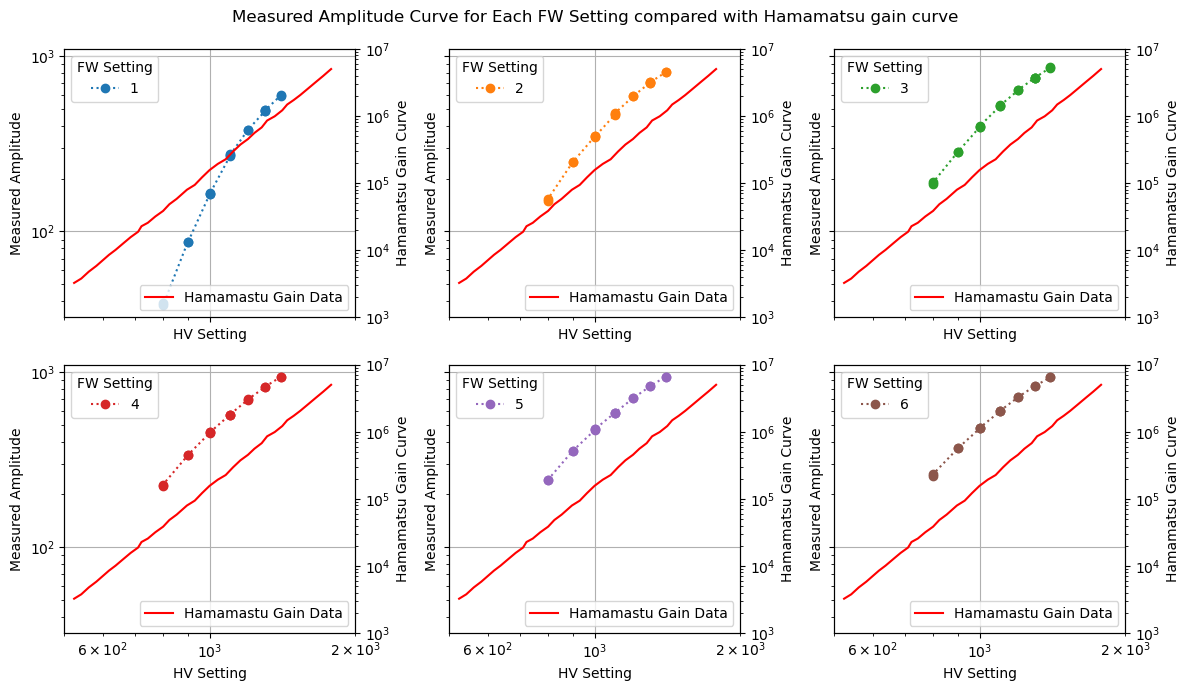

In [81]:
fig,axs = plt.subplots(2,3,figsize=(12,7),sharex=True, sharey=True)
counter = 0
for i, dfi in df.groupby(by='FW'):
    ax = axs.ravel()[counter]
    plt.sca(ax)
    plt.plot(dfi['HV'], dfi['Peak-to-Peak'], 'o:', color=f'C{counter}', label=f'{i}')
    # print(i)
    ax2 = ax.twinx()
    ax2.plot(hx,hy, color='r',label='Hamamastu Gain Data')

    ax.legend(title='FW Setting',loc=2)
    ax.grid()
    ax2.legend(loc=4)

    ax.set_yscale("log")
    ax2.set_yscale("log")
    ax.set_xscale("log")
    ax.set_ylabel("Measured Amplitude")
    ax.set_xlabel("HV Setting")
    ax2.set_ylabel("Hamamatsu Gain Curve")
    ax2.set_ylim(1e3,1e7)
    counter += 1
ax.set_xlim(500,2000)
plt.suptitle("Measured Amplitude Curve for Each FW Setting compared with Hamamatsu gain curve")
plt.tight_layout()
plt.show()
# break

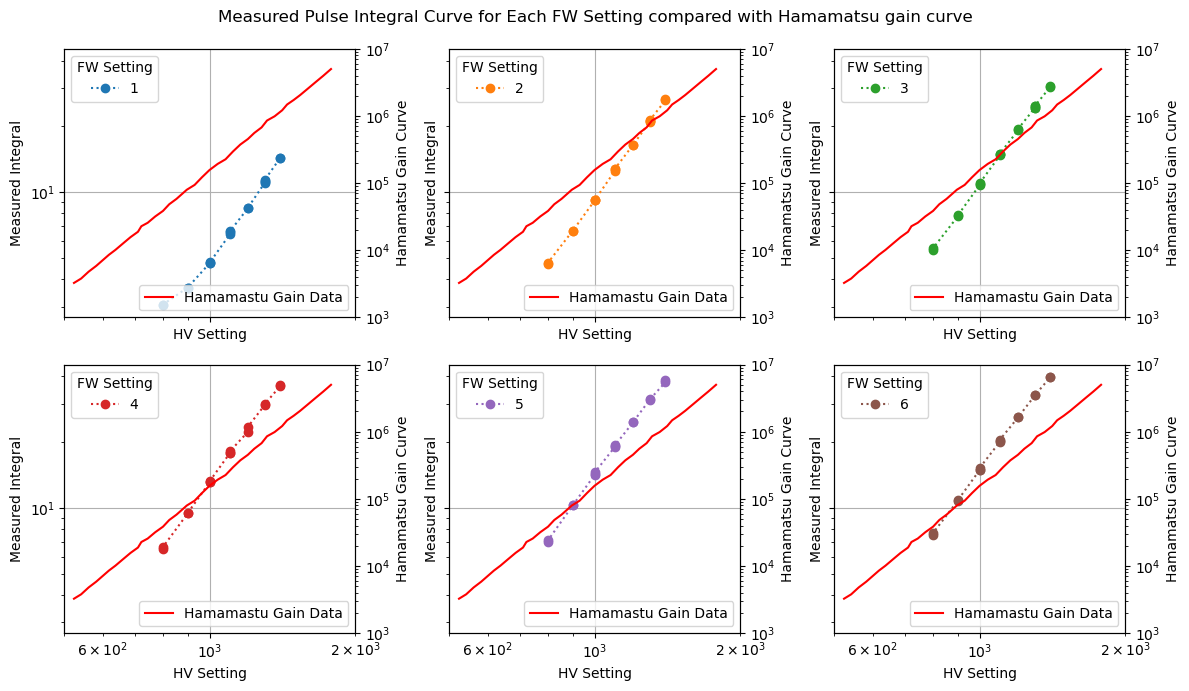

In [82]:
fig,axs = plt.subplots(2,3,figsize=(12,7),sharex=True, sharey=True)
counter = 0
for i, dfi in df.groupby(by='FW'):
    ax = axs.ravel()[counter]
    plt.sca(ax)
    plt.plot(dfi['HV'], dfi['Area'], 'o:', color=f'C{counter}', label=f'{i}')
    # print(i)
    ax2 = ax.twinx()
    ax2.plot(hx,hy, color='r',label='Hamamastu Gain Data')

    ax.legend(title='FW Setting',loc=2)
    ax.grid()
    ax2.legend(loc=4)

    ax.set_yscale("log")
    ax2.set_yscale("log")
    ax.set_xscale("log")
    ax.set_ylabel("Measured Integral")
    ax.set_xlabel("HV Setting")
    ax2.set_ylabel("Hamamatsu Gain Curve")
    ax2.set_ylim(1e3,1e7)
    counter += 1
ax.set_xlim(500,2000)
plt.suptitle("Measured Pulse Integral Curve for Each FW Setting compared with Hamamatsu gain curve")
plt.tight_layout()
plt.show()
# break